<a href="https://colab.research.google.com/github/IT21388934/DL_LAB_07/blob/main/lab_7_AE_CNN_Image_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [34]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


In [35]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [36]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [37]:
tf.random.normal(shape=x_train.shape)

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[ 1.11931551e+00],
         [-3.70129019e-01],
         [-9.11093116e-01],
         ...,
         [-7.97783792e-01],
         [ 1.03742146e+00],
         [ 2.08942223e+00]],

        [[-6.26721740e-01],
         [-3.13138068e-01],
         [ 7.89752364e-01],
         ...,
         [ 2.71875858e-01],
         [-1.06557417e+00],
         [ 2.14659616e-01]],

        [[ 5.11480331e-01],
         [ 1.36272376e-02],
         [ 2.18995035e-01],
         ...,
         [ 7.37674057e-01],
         [-1.39941120e+00],
         [-5.76265335e-01]],

        ...,

        [[ 9.46678817e-02],
         [-2.24420890e-01],
         [ 1.30379522e+00],
         ...,
         [ 2.16358036e-01],
         [ 2.71466851e-01],
         [ 9.83439267e-01]],

        [[-6.58663571e-01],
         [ 6.95013463e-01],
         [ 1.34462327e-01],
         ...,
         [-6.70675159e-01],
         [ 8.66962373e-01],
         [ 8.42692912e-01]],

      

In [38]:
noise_factor = 0.2
x_train_noisy = x_train  +  noise_factor * tf.random.normal(shape=x_train.shape)
# noise factor multiplication result in increased spread in noise distribution
# result in 0.2^2 increase of variance, mean doesn't chnage (mean = 0)
x_test_noisy = x_test  +  noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [39]:
x_test_noisy.shape

TensorShape([10000, 28, 28, 1])

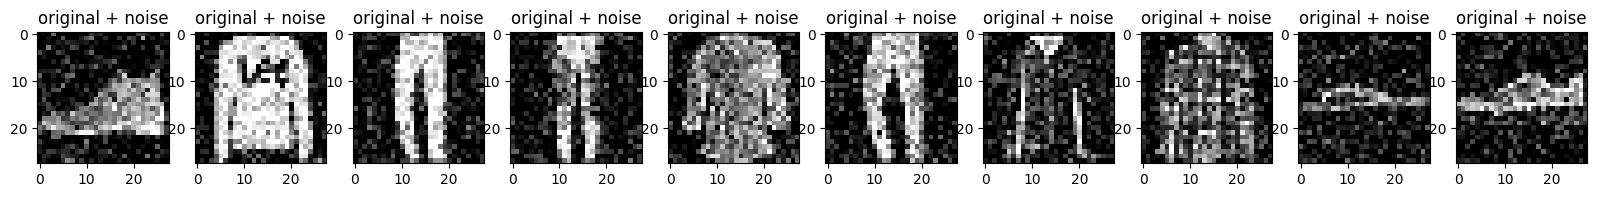

In [40]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [41]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [42]:
autoencoder = Denoise()

In [43]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [44]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - loss: 0.0357 - val_loss: 0.0103
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 33ms/step - loss: 0.0097 - val_loss: 0.0088
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - loss: 0.0086 - val_loss: 0.0082
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 29ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 24ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 12

In [45]:
autoencoder.encoder.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
autoencoder.decoder.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose_4 (Conv2DTranspose) │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

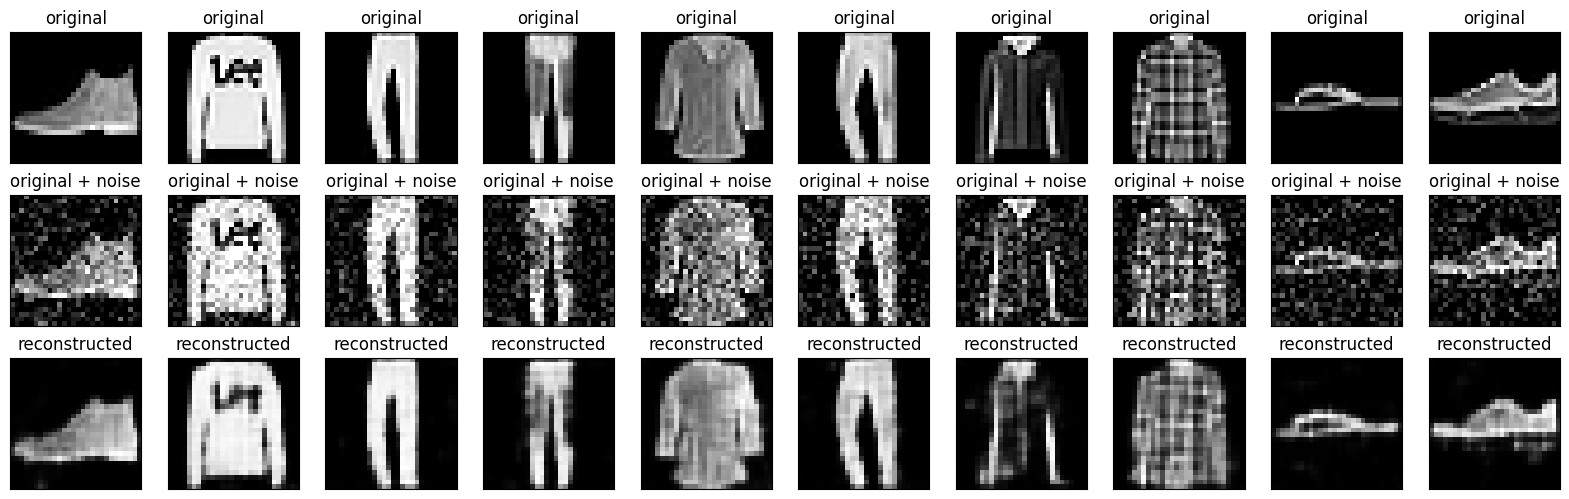

In [48]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original + noise
    ax = plt.subplot(3, n, i + n + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [49]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error

# Generate the reconstructed images from the test dataset
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

# Calculate Mean Squared Error (MSE) for the test dataset
# Flatten both original and reconstructed images for MSE calculation
x_test_flat = x_test.reshape((x_test.shape[0], -1))  # Reshape to (num_samples, 784)
decoded_imgs_flat = decoded_imgs.reshape((decoded_imgs.shape[0], -1))  # Reshape similarly

# Calculate MSE for each image and then take the average
mse = mean_squared_error(x_test_flat, decoded_imgs_flat)
print(f"Mean Squared Error on test dataset: {mse}")

Mean Squared Error on test dataset: 0.004717715084552765


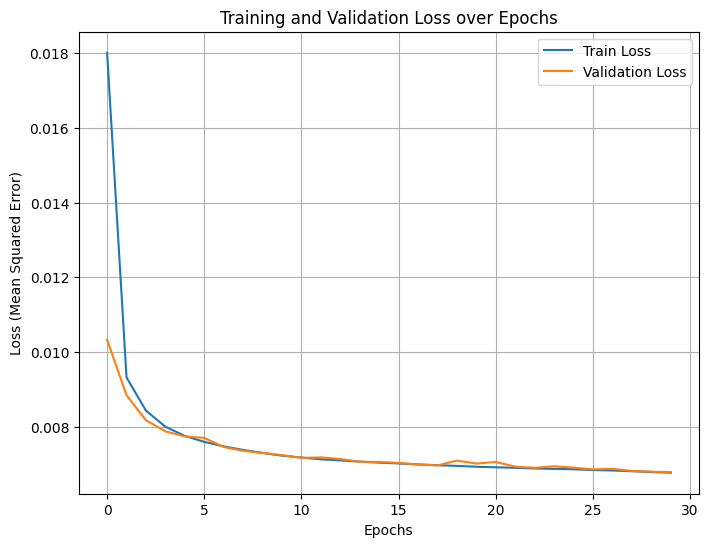

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()